# <font color='blue'>Data Science Academy</font>

## <font color='blue'>Fundamentos de Linguagem Python Para Análise de Dados e Data Science</font>

## <font color='blue'>Projeto 2</font>

## <font color='blue'>Análise Exploratória de Dados em Linguagem Python Para a Área de Varejo</font>

![DSA](imagens/projeto2.png)

In [2]:
# Versão da Linguagem Python
from platform import python_version
print('Versão da Linguagem Python Usada Neste Jupyter Notebook:', python_version())

Versão da Linguagem Python Usada Neste Jupyter Notebook: 3.9.13


In [400]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import warnings

# Ignorar warnings para melhor legibilidade
warnings.filterwarnings("ignore")

## Carregando os Dados

In [4]:
# Carrega o dataset
df_dsa = pd.read_csv('dados/dataset.csv')

In [5]:
# Shape
df_dsa.shape

(9700, 11)

In [6]:
# Amostra dos dados
df_dsa.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda
0,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600
1,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400
2,CA-2017-138688,12/06/2017,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200
3,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775
4,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680


In [7]:
# Amostra dos dados
df_dsa.tail()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda
9695,CA-2018-154116,15/12/2018,KM-16660,Consumer,United States,Inglewood,California,OFF-PA-10004569,Office Supplies,Paper,22.830
9696,CA-2018-154116,15/12/2018,KM-16660,Consumer,United States,Inglewood,California,OFF-AP-10000027,Office Supplies,Appliances,54.320
9697,CA-2018-154116,15/12/2018,KM-16660,Consumer,United States,Inglewood,California,TEC-PH-10000675,Technology,Phones,196.776
9698,CA-2017-105291,30/10/2017,SP-20920,Consumer,United States,San Luis Obispo,California,OFF-FA-10003059,Office Supplies,Fasteners,3.620
9699,CA-2018-147032,31/07/2018,LB-16795,Home Office,United States,Wilmington,Delaware,OFF-PA-10003256,Office Supplies,Paper,11.540


## Análise Exploratória

In [8]:
# Colunas do conjunto de dados
df_dsa.columns

Index(['ID_Pedido', 'Data_Pedido', 'ID_Cliente', 'Segmento', 'Pais', 'Cidade',
       'Estado', 'ID_Produto', 'Categoria', 'SubCategoria', 'Valor_Venda'],
      dtype='object')

In [9]:
# Verificando o tipo de dado de cada coluna
df_dsa.dtypes

ID_Pedido        object
Data_Pedido      object
ID_Cliente       object
Segmento         object
Pais             object
Cidade           object
Estado           object
ID_Produto       object
Categoria        object
SubCategoria     object
Valor_Venda     float64
dtype: object

In [10]:
# Resumo estatístico da coluna com o valor de venda
df_dsa['Valor_Venda'].describe()

count     9700.000000
mean       230.469892
std        627.504252
min          0.444000
25%         17.248000
50%         54.272000
75%        209.932500
max      22638.480000
Name: Valor_Venda, dtype: float64

In [11]:
# Verificando se há registros duplicados
df_dsa[df_dsa.duplicated()]

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda


In [12]:
# Verificando de há valores ausentes
df_dsa.isnull().sum()

ID_Pedido       0
Data_Pedido     0
ID_Cliente      0
Segmento        0
Pais            0
Cidade          0
Estado          0
ID_Produto      0
Categoria       0
SubCategoria    0
Valor_Venda     0
dtype: int64

## Pergunta de Negócio 1:

### Qual Cidade com Maior Valor de Venda de Produtos da Categoria 'Office Supplies'?

Como a pergunta não deixa claro se por "maior valor de venda" trata-se da SOMA de vendas ou do maior valor UNITÁRIO de venda realizada, optei por respondê-la de ambas as formas a fim de evitar possíveis desvios de interpretação.

In [153]:
# Identificando a cidade com o maior volume de vendas considerando apenas a categoria Office Suplies

df_dsa[['Cidade', 'Valor_Venda']][ df_dsa.Categoria == 'Office Supplies' ] \
                            .groupby('Cidade') \
                            .sum() \
                            .sort_values(by='Valor_Venda', ascending=False) \
                            .head(1)

,Valor_Venda
Cidade,
New York City,68362.814


A cidade de Nova Iorque lidera o total de vendas da categoria Office Suplies, com cerca de 69K dólares.

In [91]:
# Identificando a cidade com pedido de maior valor para a categoria Office Suplies

df_dsa[['Cidade', 'Valor_Venda']][ df_dsa.Categoria == 'Office Supplies' ] \
                            .groupby('Cidade') \
                            .max() \
                            .sort_values(by='Valor_Venda', ascending=False) \
                            .head(1)

,Valor_Venda
Cidade,
Detroit,9892.74


Já a cidade que teve o pedido com maior valor na categoria Office Suplies foi Detroit, com 9.8k dólares.

## Pergunta de Negócio 2:

### Qual o Total de Vendas Por Data do Pedido?

Demonstre o resultado através de um gráfico de barras.

In [214]:
# Definindo o dataframe base para o gráfico
df_dsa2 = df_dsa.groupby('Data_Pedido')['Valor_Venda'].sum()

In [215]:
# Visualização dos itens
df_dsa2.head()

Data_Pedido
01/01/2018    1481.8280
01/02/2015     468.9000
01/02/2017     161.9700
01/03/2015    2203.1510
01/03/2016    1642.1744
Name: Valor_Venda, dtype: float64

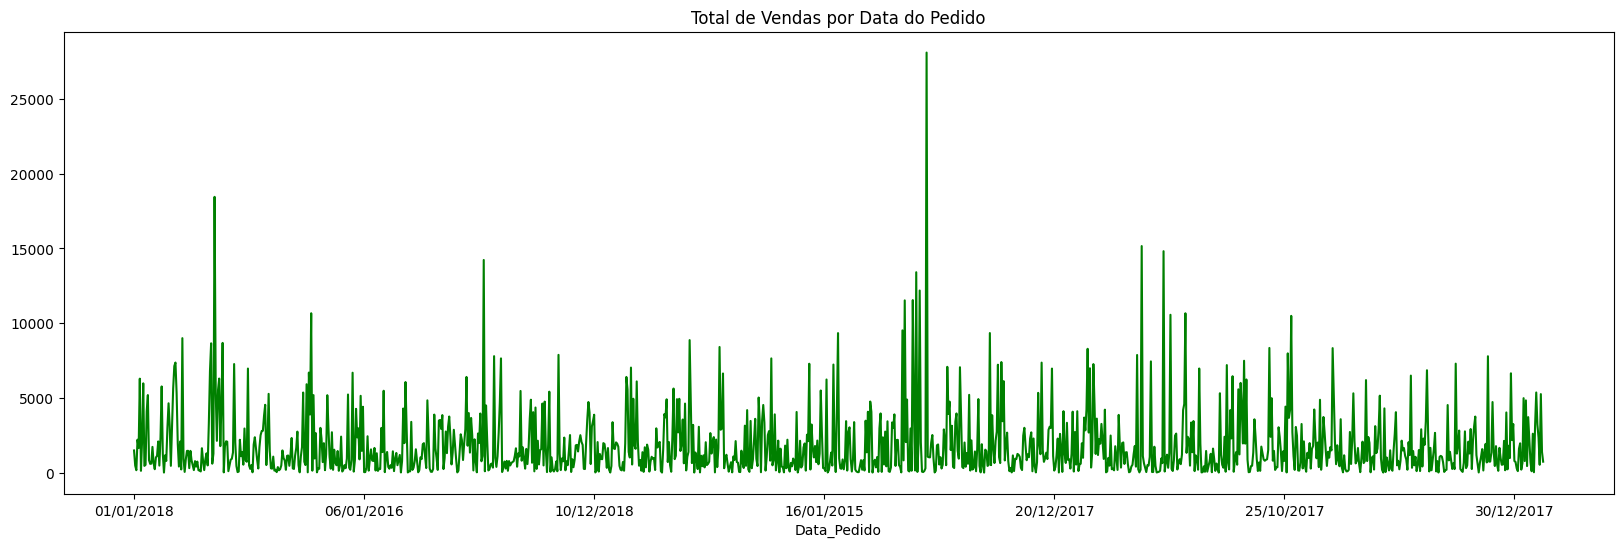

In [262]:
# Plot

# Definição do tamanho da figura
plt.figure(figsize = (20,6))

# Atribuição dos eixos e cor do gráfico
df_dsa2.plot(x = 'Data_Pedido', y = 'Valor_Venda', color = 'green')

# Atribuição do título
plt.title('Total de Vendas por Data do Pedido')

# Execução do método show()
plt.show()

## Pergunta de Negócio 3:

### Qual o Total de Vendas por Estado?

Demonstre o resultado através de um gráfico de barras.

In [274]:
# Reexibição dos dados para melhor visualização
df_dsa.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda
0,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600
1,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400
2,CA-2017-138688,12/06/2017,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200
3,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775
4,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680


In [275]:
# Definindo o dataframe base para o gráfico
df_dsa3 = df_dsa.groupby('Estado')['Valor_Venda'].sum()

# Redefinição de índices para ordenação de valores
df_dsa3 = df_dsa3.reset_index(name='Total_Vendas')

# Ordenação de valores para apresentação no gráfico de barras
df_dsa3 = df_dsa3.sort_values(by='Total_Vendas', ascending = False)

# Exibição dos resultados
df_dsa3.head()

,Estado,Total_Vendas
3,California,442927.0975
30,New York,304536.4010
41,Texas,163549.8602
45,Washington,133826.0060
36,Pennsylvania,114411.6800


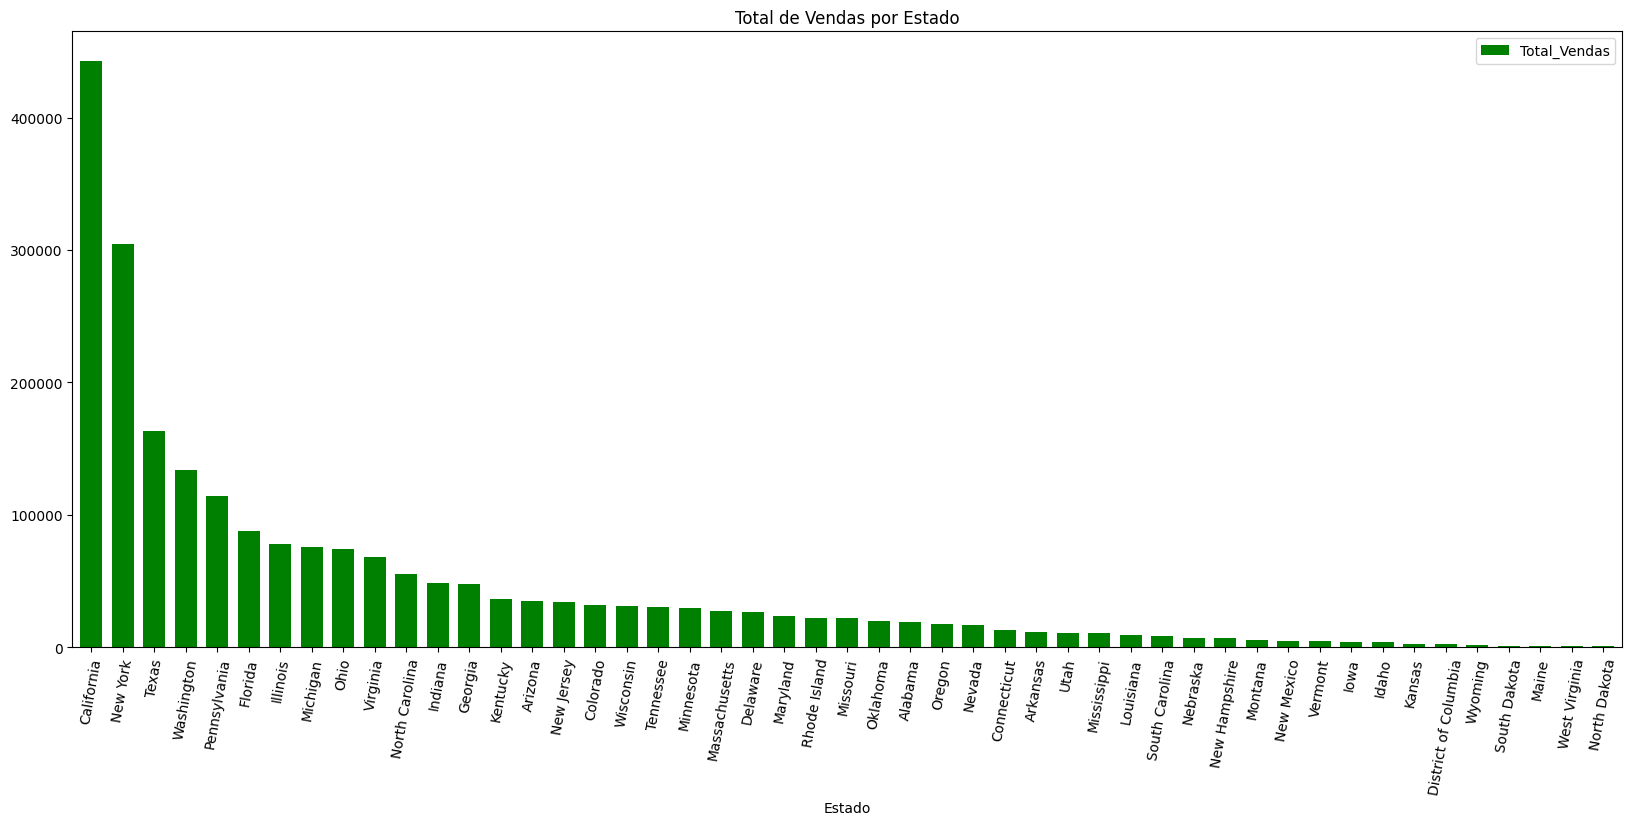

In [276]:
# Plot

# Atribuição do tipo, tamanho, eixos e cor do gráfico
df_dsa3.plot(kind = 'bar', figsize = (20,8), x = 'Estado', y = 'Total_Vendas', color = 'green', width = 0.7)

# Rotação para melhor leitura
plt.xticks(rotation = 80)

# Atribuição do título
plt.title('Total de Vendas por Estado')

# Execução do método show()
plt.show()

Resolução por meio de Seaborn:

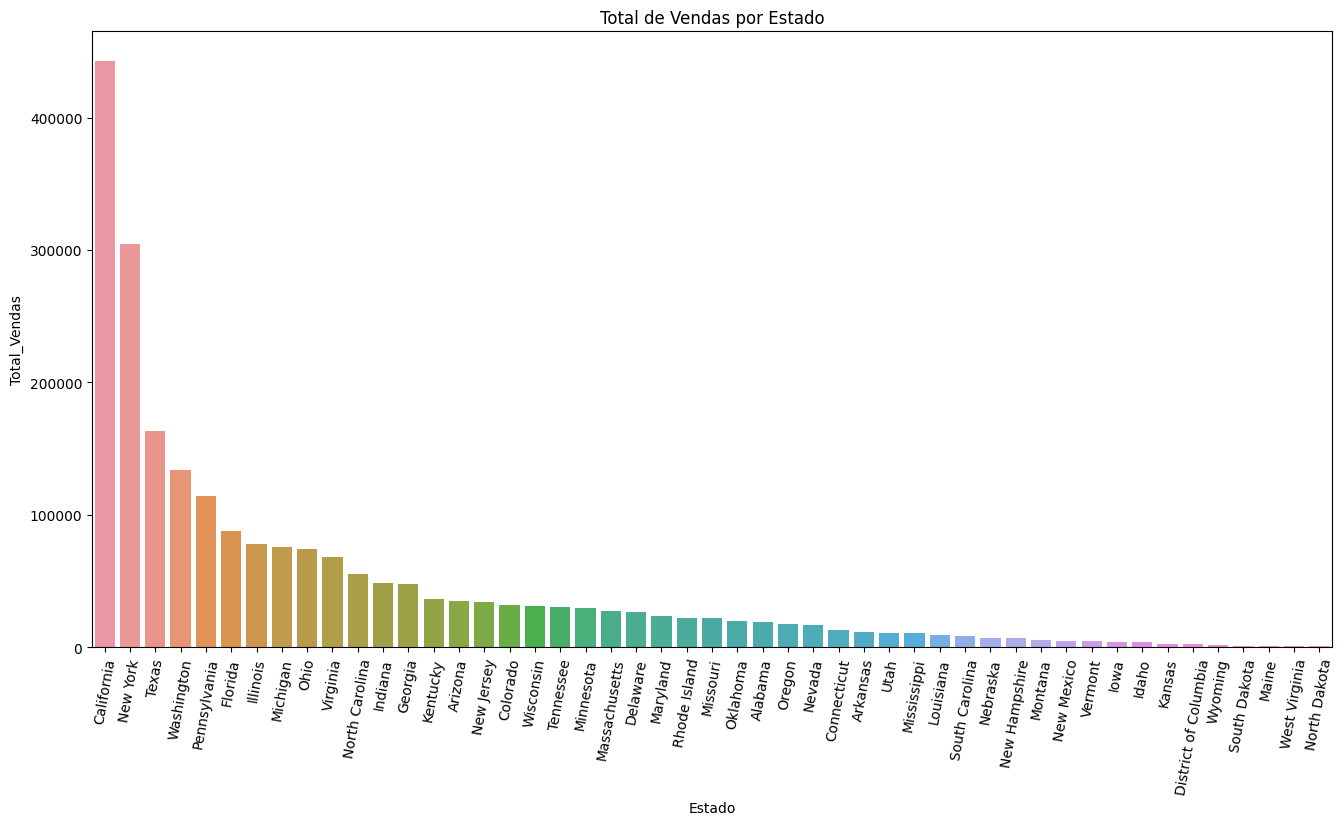

In [277]:
# Plot

# Definição do tamanho da figura
plt.figure(figsize=(16,8))

sns.barplot(data = df_dsa3, x ='Estado', y ='Total_Vendas').set(title = 'Total de Vendas por Estado')
plt.xticks(rotation = 80)
plt.show()

De acordo com o gráfico, o Estado da California não apenas é líder de vendas no varejo americano, faturando cerca de 45k no período analisado, como também seu volume é 50% maior que Nova Iorque, que é o segundo estado com maior volume de vendas.

## Pergunta de Negócio 4:

### Quais São as 10 Cidades com Maior Total de Vendas?

Demonstre o resultado através de um gráfico de barras.

In [278]:
# Definindo o dataframe base para o gráfico
df_dsa4 = df_dsa.groupby('Cidade')['Valor_Venda'].sum()

# Redefinição de índices para ordenação de valores
df_dsa4 = df_dsa4.reset_index(name='Total_Vendas')

# Ordenação de valores para apresentação no gráfico de barras
df_dsa4 = df_dsa4.sort_values(by='Total_Vendas', ascending = False)

# Definição do Top 10
df_dsa4 = df_dsa4.head(10)

# Exibição dos resultados
df_dsa4.head(12)

,Cidade,Total_Vendas
327,New York City,251749.2190
265,Los Angeles,171654.6330
450,Seattle,114725.4780
436,San Francisco,107489.9520
372,Philadelphia,107197.8030
207,Houston,61590.1868
435,San Diego,47458.3790
80,Chicago,46974.3430
216,Jacksonville,44713.1830
123,Detroit,42446.9440


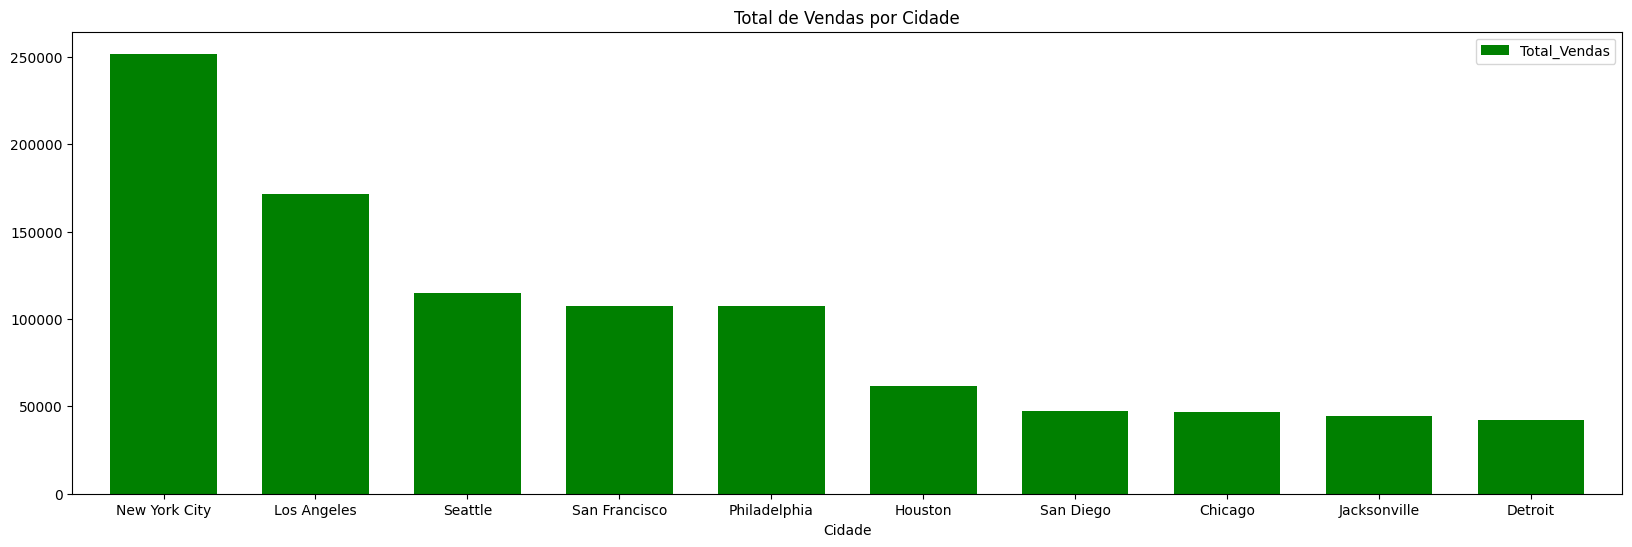

In [293]:
# Plot

# Atribuição do tipo, tamanho, eixos e cor do gráfico
df_dsa4.plot(kind = 'bar', figsize = (20,6), x = 'Cidade', y = 'Total_Vendas', color = 'green', width = 0.7)

# Rotação para melhor leitura
plt.xticks(rotation = 0)

# Atribuição do título
plt.title('Total de Vendas por Cidade')

# Execução do método show()
plt.show()

Resolução por meio de Seaborn:

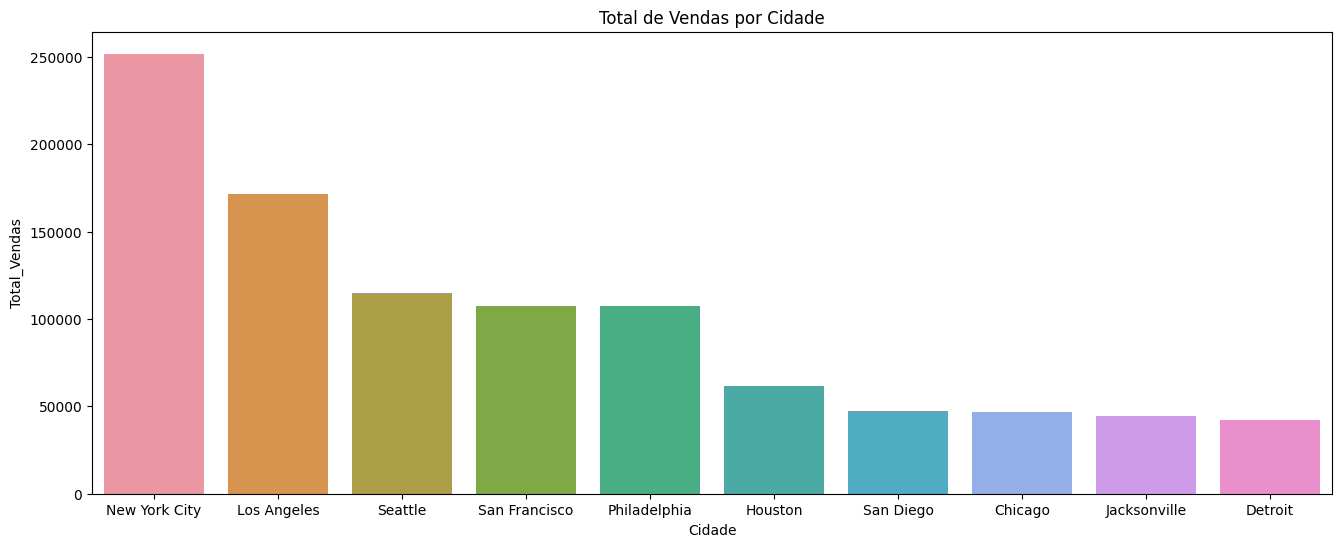

In [290]:
# Plot

# Definição do tamanho da figura
plt.figure(figsize=(16,6))

sns.set_palette('coolwarm')
sns.barplot(data = df_dsa4, x ='Cidade', y ='Total_Vendas').set(title = 'Total de Vendas por Cidade')
plt.show()

De acordo com o gráfico, Nova Iorque faturou no período cerca de 25k dólares, seguida de Los Angeles com 17k (cerca de 50% menos volume que a líder).

## Pergunta de Negócio 5:

### Qual Segmento Teve o Maior Total de Vendas?

Demonstre o resultado através de um gráfico de pizza.

In [294]:
# Reexibição dos dados para melhor visualização
df_dsa.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda
0,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600
1,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400
2,CA-2017-138688,12/06/2017,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200
3,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775
4,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680


In [305]:
# Definindo o dataframe base para o gráfico
df_dsa5 = df_dsa.groupby('Segmento')['Valor_Venda'].sum()

# Redefinição de índices para ordenação de valores
df_dsa5 = df_dsa5.reset_index()

# Ordenação de valores para apresentação no gráfico de barras
df_dsa5 = df_dsa5.sort_values(by='Valor_Venda', ascending = False)

# Visualização dos dados
df_dsa5.head(5)

,Segmento,Valor_Venda
0,Consumer,1.133834e+06
1,Corporate,6.792322e+05
2,Home Office,4.224914e+05


In [306]:
# Função para converter os dados em valor absoluto
def autopct_format(values):
    def my_format(pct):
        total = sum(values)
        val = int(round(pct * total / 100.0))
        return ' $ {v:d}'.format(v = val)
    return my_format

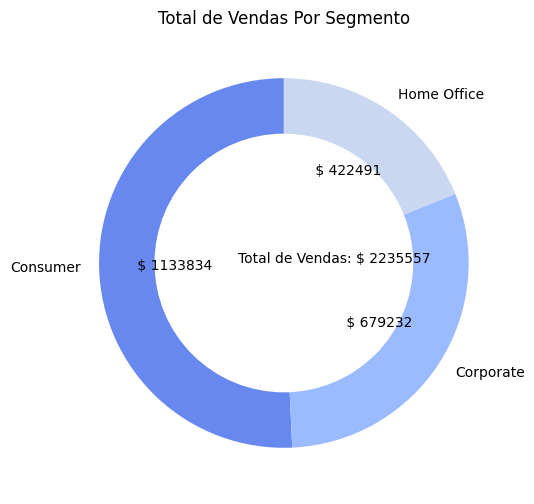

In [310]:
# Plot

# Gerando uma figura
plt.figure(figsize = (16,6))

# Gráfico de pizza
plt.pie(df_dsa5['Valor_Venda'],
        labels = df_dsa5['Segmento'],
        autopct = autopct_format(df_dsa5['Valor_Venda']),
        startangle=90)
        
#Limpa o círculo central
centre_circle = plt.Circle((0,0), 0.7, fc = 'white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

#Labels e anotações
plt.annotate(text = 'Total de Vendas: ' + '$ ' + str(int(sum(df_dsa5['Valor_Venda']))), xy = (-0.25,0))
plt.title('Total de Vendas Por Segmento')
plt.show()

Os pedidos do segmento Consumer ultrapassam a metade de todo o varejo do país no período analisado.

## Pergunta de Negócio 6 (Desafio Nível Baby):

### Qual o Total de Vendas Por Segmento e Por Ano?

In [323]:
# Reexibição dos dados para melhor visualização
df_dsa.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda
0,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.96
1,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.94
2,CA-2017-138688,12/06/2017,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.62
3,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.58
4,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.37


In [325]:
# Adição da coluna ano
df_dsa['Ano'] = df_dsa.Data_Pedido.str[-4:]

In [426]:
# Exibindo o dataframe para averiguar a adição da coluna ano
df_dsa.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda,Ano,Data_Pedido_Formatada,Ano_Formatado,Pct_Desconto,Valor_Venda_Descontado,Mês
0,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.96,2017,2017-11-08,2017,0.10,261.96,11
1,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.94,2017,2017-11-08,2017,0.10,731.94,11
2,CA-2017-138688,12/06/2017,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.62,2017,2017-06-12,2017,0.10,14.62,6
3,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.58,2016,2016-10-11,2016,0.10,957.58,10
4,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.37,2016,2016-10-11,2016,0.10,22.37,10


In [337]:
# Definindo o dataframe
df_dsa6 = df_dsa.groupby(['Ano','Segmento'])['Valor_Venda'].sum()

# Redefinição de índices para ordenação de valores
df_dsa6 = df_dsa6.reset_index(name='Total_Vendas')

# Ordenação de valores para apresentação no gráfico de barras
df_dsa6 = df_dsa6.sort_values(by='Ano', ascending = False)

# Exibição dos resultados
df_dsa6.head(100)

,Ano,Segmento,Total_Vendas
9,2018,Consumer,323359.60
10,2018,Corporate,235502.73
11,2018,Home Office,156488.58
6,2017,Consumer,288459.56
7,2017,Corporate,203266.74
8,2017,Home Office,103639.63
3,2016,Consumer,265295.26
4,2016,Corporate,114643.12
5,2016,Home Office,74134.13
0,2015,Consumer,256719.92


**Resolução utilizando o datetime**:

In [333]:
# Conversão da coluna de data para o tipo correto
df_dsa['Data_Pedido_Formatada'] = pd.to_datetime(df_dsa['Data_Pedido'], dayfirst = True)

# Averiguação de tipos
df_dsa.dtypes

ID_Pedido                        object
Data_Pedido                      object
ID_Cliente                       object
Segmento                         object
Pais                             object
Cidade                           object
Estado                           object
ID_Produto                       object
Categoria                        object
SubCategoria                     object
Valor_Venda                     float64
Ano                              object
Data_Pedido_Formatada    datetime64[ns]
dtype: object

In [334]:
# Reexibição da tabela:
df_dsa.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda,Ano,Data_Pedido_Formatada
0,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.96,2017,2017-11-08
1,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.94,2017,2017-11-08
2,CA-2017-138688,12/06/2017,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.62,2017,2017-06-12
3,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.58,2016,2016-10-11
4,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.37,2016,2016-10-11


In [335]:
# Extração do ano criando nova variável
df_dsa['Ano_Formatado'] = df_dsa['Data_Pedido_Formatada'].dt.year

In [336]:
# Reexibição da tabela:
df_dsa.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda,Ano,Data_Pedido_Formatada,Ano_Formatado
0,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.96,2017,2017-11-08,2017
1,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.94,2017,2017-11-08,2017
2,CA-2017-138688,12/06/2017,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.62,2017,2017-06-12,2017
3,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.58,2016,2016-10-11,2016
4,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.37,2016,2016-10-11,2016


In [350]:
# Criando o dataframe novamente
df_dsa6_2 = df_dsa.groupby(['Ano_Formatado','Segmento'])['Valor_Venda'].sum()
df_dsa6_2

Ano_Formatado  Segmento   
2015           Consumer      256719.92
               Corporate     125819.60
               Home Office    88229.09
2016           Consumer      265295.26
               Corporate     114643.12
               Home Office    74134.13
2017           Consumer      288459.56
               Corporate     203266.74
               Home Office   103639.63
2018           Consumer      323359.60
               Corporate     235502.73
               Home Office   156488.58
Name: Valor_Venda, dtype: float64

## Pergunta de Negócio 7 (Desafio Nível Júnior):

Os gestores da empresa estão considerando conceder diferentes faixas de descontos e gostariam de fazer uma simulação com base na regra abaixo:

- Se o Valor_Venda for maior que 1000 recebe 15% de desconto.
- Se o Valor_Venda for menor que 1000 recebe 10% de desconto.

### Quantas Vendas Receberiam 15% de Desconto?

In [351]:
# Reexibição dos dados para melhor visualização
df_dsa.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda,Ano,Data_Pedido_Formatada,Ano_Formatado
0,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.96,2017,2017-11-08,2017
1,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.94,2017,2017-11-08,2017
2,CA-2017-138688,12/06/2017,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.62,2017,2017-06-12,2017
3,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.58,2016,2016-10-11,2016
4,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.37,2016,2016-10-11,2016


In [354]:
# Criação da Coluna Percentual de Desconto
df_dsa['Pct_Desconto'] = df_dsa['Valor_Venda'].apply(lambda x: 0.15 if x > 1000 else 0.10)

In [356]:
# Conferência da criação da coluna condicional
df_dsa.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda,Ano,Data_Pedido_Formatada,Ano_Formatado,Pct_Desconto
0,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.96,2017,2017-11-08,2017,0.10
1,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.94,2017,2017-11-08,2017,0.10
2,CA-2017-138688,12/06/2017,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.62,2017,2017-06-12,2017,0.10
3,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.58,2016,2016-10-11,2016,0.10
4,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.37,2016,2016-10-11,2016,0.10


In [367]:
df_dsa['Pct_Desconto'].value_counts()

Pct_Desconto
0.10    9243
0.15     457
Name: count, dtype: int64

## Pergunta de Negócio 8 (Desafio Nível Master):

### Considere Que a Empresa Decida Conceder o Desconto de 15% do Item Anterior. Qual Seria a Média do Valor de Venda Antes e Depois do Desconto?

In [370]:
df_dsa['Valor_Venda_Descontado'] =  np.where(df_dsa['Pct_Desconto'] == 0.15,
                                    ((1- df_dsa['Pct_Desconto']) * df_dsa['Valor_Venda']), 
                                    df_dsa['Valor_Venda'])

In [375]:
# Conferência da criação da coluna condicional
df_dsa[ df_dsa.Pct_Desconto == 0.15].head(5)

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda,Ano,Data_Pedido_Formatada,Ano_Formatado,Pct_Desconto,Valor_Venda_Descontado
10,CA-2015-115812,09/06/2015,BH-11710,Consumer,United States,Los Angeles,California,FUR-TA-10001539,Furniture,Tables,1706.18,2015,2015-06-09,2015,0.15,1450.26
24,CA-2016-106320,25/09/2016,EB-13870,Consumer,United States,Orem,Utah,FUR-TA-10000577,Furniture,Tables,1044.63,2016,2016-09-25,2016,0.15,887.94
27,US-2016-150630,17/09/2016,TB-21520,Consumer,United States,Philadelphia,Pennsylvania,FUR-BO-10004834,Furniture,Bookcases,3083.43,2016,2016-09-17,2016,0.15,2620.92
35,CA-2017-117590,08/12/2017,GH-14485,Corporate,United States,Richardson,Texas,TEC-PH-10004977,Technology,Phones,1097.54,2017,2017-12-08,2017,0.15,932.91
54,CA-2017-105816,11/12/2017,JM-15265,Corporate,United States,New York City,New York,TEC-PH-10002447,Technology,Phones,1029.95,2017,2017-12-11,2017,0.15,875.46


In [380]:
# Averiguação do valor médio de vendas
print('Valor de venda médio antes do desconto: ', round(df_dsa.Valor_Venda.mean(), 2))
print('Valor de venda médio depois do desconto: ', round(df_dsa.Valor_Venda_Descontado.mean(), 2))

Valor de venda médio antes do desconto:  230.47
Valor de venda médio depois do desconto:  215.51


**Importante frisar que foi aplicado apenas o desconto de 15% na coluna Valor_Venda_Descontado, embora tenhamos inserido os 10% no tópico anterior. Como a questão fala sobre a média apenas se 15% fosse aplicado, foi criada a coluna Valor_Descontado considerando apenas o desconto de 15% nas linhas aplicáveis.**

## Pergunta de Negócio 9 (Desafio Nível Master Ninja):

### Qual o Média de Vendas Por Segmento, Por Ano e Por Mês?

Demonstre o resultado através de gráfico de linha.

In [383]:
# Criação da coluna mês
df_dsa['Mês'] = df_dsa['Data_Pedido_Formatada'].dt.month

In [384]:
# Conferência da criação da nova coluna:
df_dsa.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda,Ano,Data_Pedido_Formatada,Ano_Formatado,Pct_Desconto,Valor_Venda_Descontado,Mês
0,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.96,2017,2017-11-08,2017,0.10,261.96,11
1,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.94,2017,2017-11-08,2017,0.10,731.94,11
2,CA-2017-138688,12/06/2017,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.62,2017,2017-06-12,2017,0.10,14.62,6
3,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.58,2016,2016-10-11,2016,0.10,957.58,10
4,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.37,2016,2016-10-11,2016,0.10,22.37,10


In [395]:
# Definindo o dataframe base para o gráfico
df_dsa9 = df_dsa.groupby(['Ano_Formatado', 'Mês', 'Segmento'])['Valor_Venda'].agg(['sum', 'mean', 'median'])
df_dsa9

sum   mean  median
Ano_Formatado Mês Segmento                           
2015          1   Consumer     6896.63 146.74   36.44
                  Corporate    1701.53 130.89   51.94
                  Home Office  5607.55 329.86   62.82
              2   Consumer     3167.85 117.33   22.78
                  Corporate     623.12  69.24   62.31
...                                ...    ...     ...
2018          11  Corporate   44357.99 341.22   79.53
                  Home Office 24009.38 247.52   56.56
              12  Consumer    48107.46 183.62   52.53
                  Corporate   20524.43 153.17   46.46
                  Home Office 13022.39 224.52   49.26

[144 rows x 3 columns]

In [396]:
# Definição de níveis das variáveis categóricas

anos = df_dsa9.index.get_level_values(0)
meses = df_dsa9.index.get_level_values(1)
segmentos = df_dsa9.index.get_level_values(2)

<Figure size 1200x600 with 0 Axes>

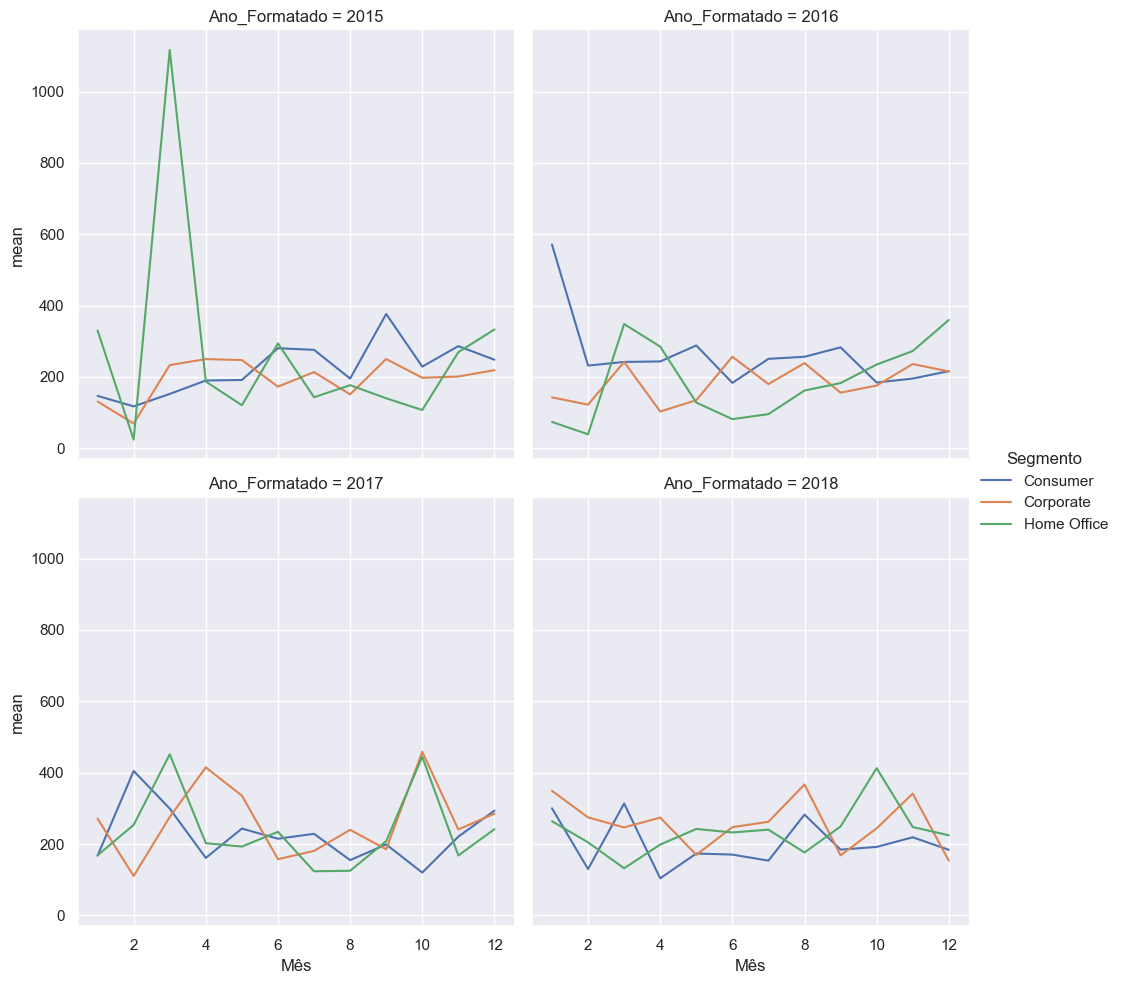

In [401]:
# Plot

plt.figure(figsize = (12,6))
sns.set()
fig1 = sns.relplot(kind = 'line',
                   data = df_dsa9,
                   y = 'mean',
                   x = meses,
                   hue = segmentos,
                   col = anos,
                   col_wrap = 2)
plt.show()

De forma geral, conforme o gráfico, os valores dos pedidos permanecem num valor médio de 200 dólares, com eventuais osilações para até 400 dólares. Apenas em 2016, vemos em março, o segmento home office tendo o valor médio de vendas subindo drasticamente para mais de 1k dóllares, provavelmente motivado por algum fator externo.

## Pergunta de Negócio 10 (Desafio Nível Master Ninja das Galáxias):

### Qual o Total de Vendas Por Categoria e SubCategoria, Considerando Somente as Top 12 SubCategorias? 

Demonstre tudo através de um único gráfico.

In [402]:
# Reexibindo o dataset para melhor visualização
df_dsa.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda,Ano,Data_Pedido_Formatada,Ano_Formatado,Pct_Desconto,Valor_Venda_Descontado,Mês
0,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.96,2017,2017-11-08,2017,0.10,261.96,11
1,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.94,2017,2017-11-08,2017,0.10,731.94,11
2,CA-2017-138688,12/06/2017,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.62,2017,2017-06-12,2017,0.10,14.62,6
3,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.58,2016,2016-10-11,2016,0.10,957.58,10
4,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.37,2016,2016-10-11,2016,0.10,22.37,10


Quem são as Top 12 subcategorias? Como o enunciado não fala sobre qual critério foi utilizado para a nomenclatura "Top", considerei que são as subcategorias com maior volume faturado.

In [422]:
# Extraindo as 12 subcategorias de maior faturamento
df_dsa10_1 = df_dsa.groupby('SubCategoria')['Valor_Venda'].sum()

# Redefinição de índices para ordenação de valores
df_dsa10_1 = df_dsa10_1.reset_index()

# Ordenação de valores para apresentação
df_dsa10_1 = df_dsa10_1.sort_values(by='Valor_Venda', ascending = False)

# Obtenção do Top 12
df_dsa10_1 = df_dsa10_1.head(12)

# Visualização da tabela
df_dsa10_1.head(20)

,SubCategoria,Valor_Venda
13,Phones,325271.29
5,Chairs,317919.62
14,Storage,216188.36
16,Tables,202083.36
3,Binders,194723.38
11,Machines,189238.63
0,Accessories,162791.36
6,Copiers,146248.09
4,Bookcases,108045.05
1,Appliances,104061.69


In [418]:
# Extraindo os 12 nomes de subcategoria
lista = list(df_dsa10_1.SubCategoria)
lista

['Phones',
 'Chairs',
 'Storage',
 'Tables',
 'Binders',
 'Machines',
 'Accessories',
 'Copiers',
 'Bookcases',
 'Appliances',
 'Furnishings',
 'Paper']

Criação do DataFrame para uso no anel interior (Dados de subcategoria):

In [437]:
# Criação do conjunto de dados com base no filtro das 12 subcategorias
df_dsa10_2 = df_dsa[ df_dsa.SubCategoria.isin(lista)].groupby(['Categoria', 'SubCategoria'])['Valor_Venda'].sum().reset_index()

# Ordenação do conjunto de dados
df_dsa10_2.sort_values(by='Categoria', ascending = True)

,Categoria,SubCategoria,Valor_Venda
0,Furniture,Bookcases,108045.05
1,Furniture,Chairs,317919.62
2,Furniture,Furnishings,88862.77
3,Furniture,Tables,202083.36
4,Office Supplies,Appliances,104061.69
5,Office Supplies,Binders,194723.38
6,Office Supplies,Paper,76312.76
7,Office Supplies,Storage,216188.36
8,Technology,Accessories,162791.36
9,Technology,Copiers,146248.09


Criação do DataFrame para uso no anel exterior (Dados de categoria):

In [438]:
# Criação do DataFrame
df_dsa10_2_cat = df_dsa10_2.groupby('Categoria').sum(numeric_only=True).reset_index()

# Exibição do DataFrame
df_dsa10_2_cat.head()

,Categoria,Valor_Venda
0,Furniture,716910.80
1,Office Supplies,591286.20
2,Technology,823549.38


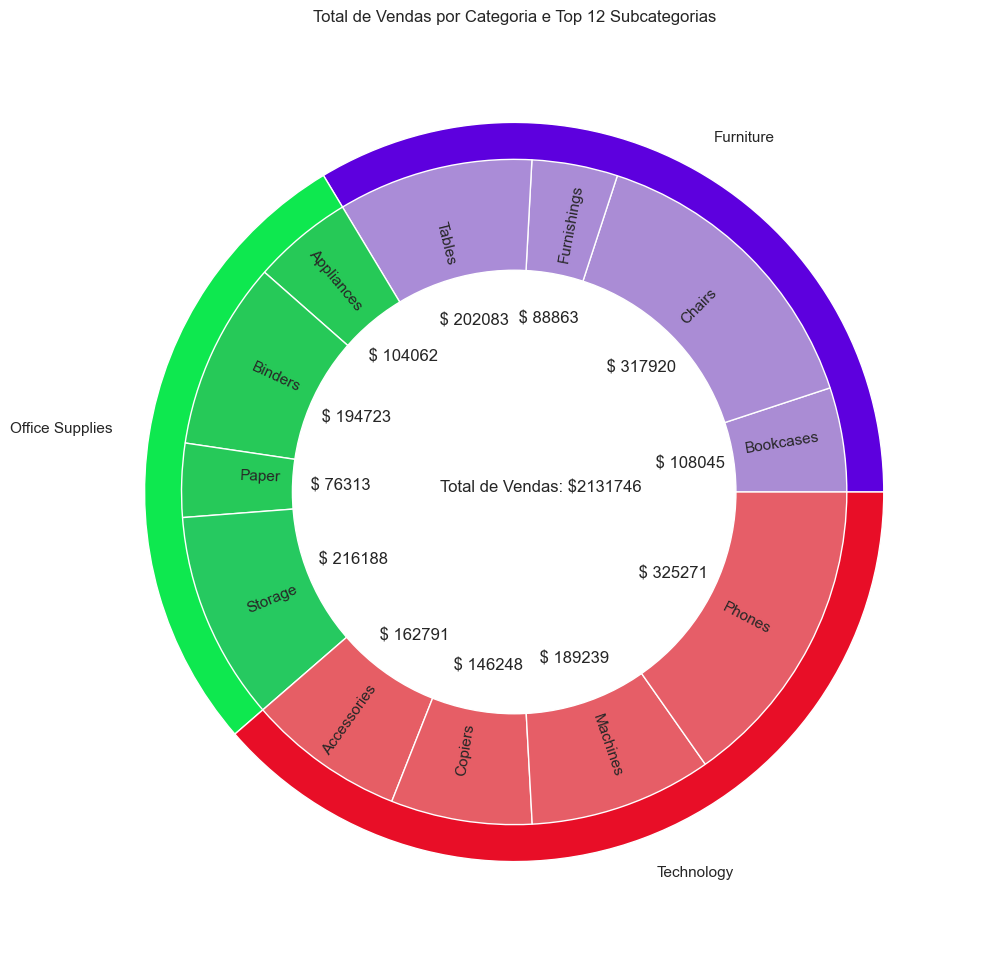

In [441]:
# Plot

# Definição de cores das figuras
cores_categorias = ['#5d00de',
                    '#0ee84f',
                    '#e80e27']

cores_subcategorias = ['#aa8cd4',
                       '#aa8cd5',
                       '#aa8cd6',
                       '#aa8cd7',
                       '#26c957',
                       '#26c958',
                       '#26c959',
                       '#26c960',
                       '#e65e65',
                       '#e65e66',
                       '#e65e67',
                       '#e65e68']

# Tamanho da figura
fix, ax = plt.subplots(figsize = (18,12))

# Gráfico das categorias
p1 = ax.pie(df_dsa10_2_cat['Valor_Venda'],
            radius = 1,
            labels = df_dsa10_2_cat['Categoria'],
            wedgeprops = dict(edgecolor = 'white'),
            colors = cores_categorias)

# Gráfico das subcategorias
p2 = ax.pie(df_dsa10_2['Valor_Venda'],
            radius = 0.9,
            labels = df_dsa10_2['SubCategoria'],
            autopct = autopct_format(df_dsa10_2['Valor_Venda']),
            colors = cores_subcategorias,
            labeldistance = 0.7,
            wedgeprops = dict(edgecolor = 'white'),
            pctdistance = 0.53,
            rotatelabels = True)

# Limpa o centro do círculo
centre_circle = plt.Circle((0,0), 0.6, fc = 'white')

# Labels e anotações
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.annotate(text = 'Total de Vendas: ' + '$' + str(int(sum(df_dsa10_2_cat['Valor_Venda']))), xy = (-0.2, 0))
plt.title('Total de Vendas por Categoria e Top 12 Subcategorias')
plt.show()

# Fim